## Load Preprocessed Data

In [461]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# load cleaned red wine data
df = pd.read_csv(r"C:\Users\mrq_q\OneDrive\Desktop\6125_group\6125_group\wine_output.csv")

# reduce to 2D using pca
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)

## PCA - Dimensionality Reduction

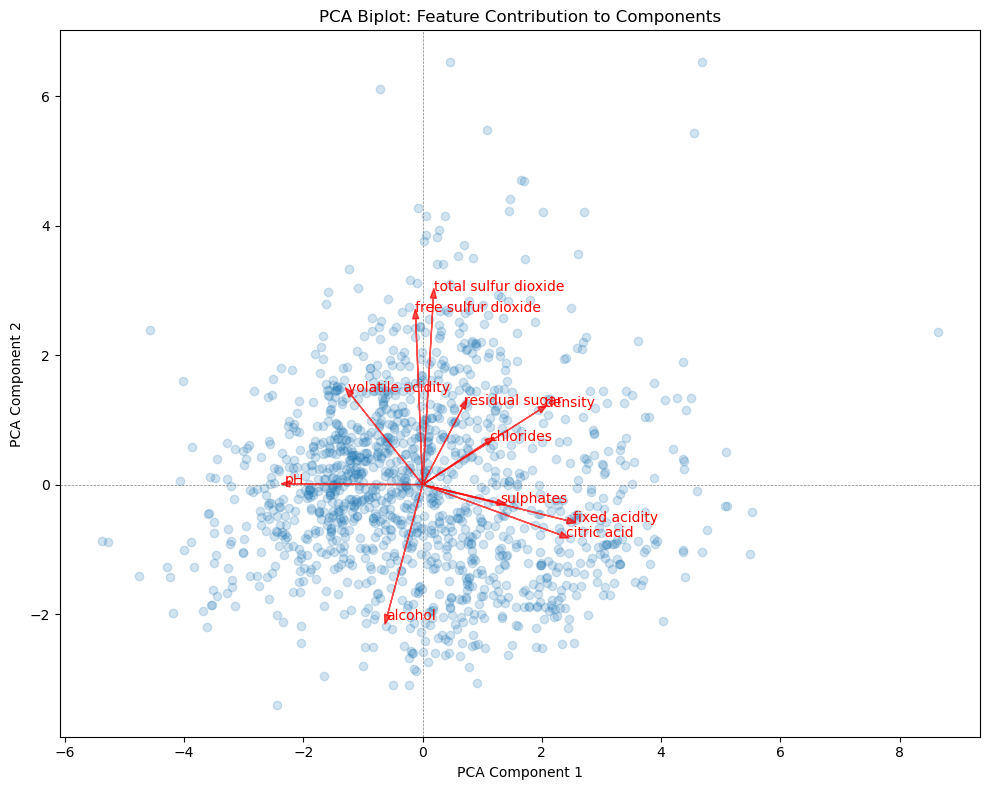

In [464]:
# get PCA components
loadings = pca.components_.T
features = df.columns 

plt.figure(figsize=(10, 8))

# plot PCA-reduced data
plt.scatter(df_pca[:, 0], df_pca[:, 1], alpha=0.2, label='Samples')

# plot arrows for feature vectors
for i, feature in enumerate(features):
    plt.arrow(0, 0, loadings[i, 0]*5, loadings[i, 1]*5,  # multiply for visibility
              color='r', alpha=0.7, head_width=0.1)
    plt.text(loadings[i, 0]*5.2, loadings[i, 1]*5.2, feature, color='r')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Biplot: Feature Contribution to Components')
plt.axhline(0, color='grey', linestyle='--', linewidth=0.5)
plt.axvline(0, color='grey', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

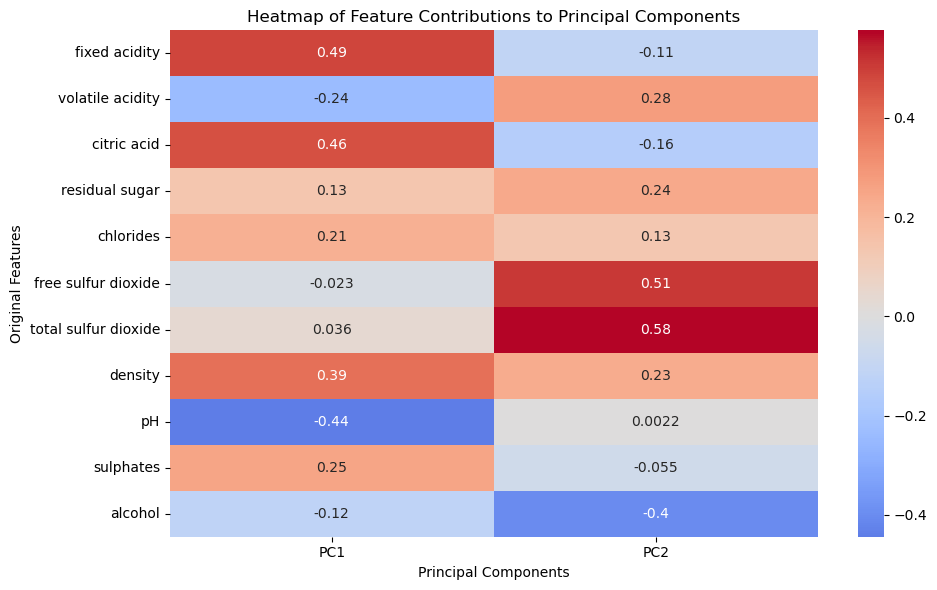

In [466]:
# create a df for PCA loadings
loading_df = pd.DataFrame(pca.components_.T, 
                          columns=[f'PC{i+1}' for i in range(pca.n_components_)],
                          index=df.columns)

# plot heatmap (feature contributions)
plt.figure(figsize=(10, 6))
sns.heatmap(loading_df, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of Feature Contributions to Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Original Features')
plt.tight_layout()
plt.savefig('plot.png')  # Saves the plot as a PNG file
plt.show()


## PCA Visualization of Wine Data Before Clustering

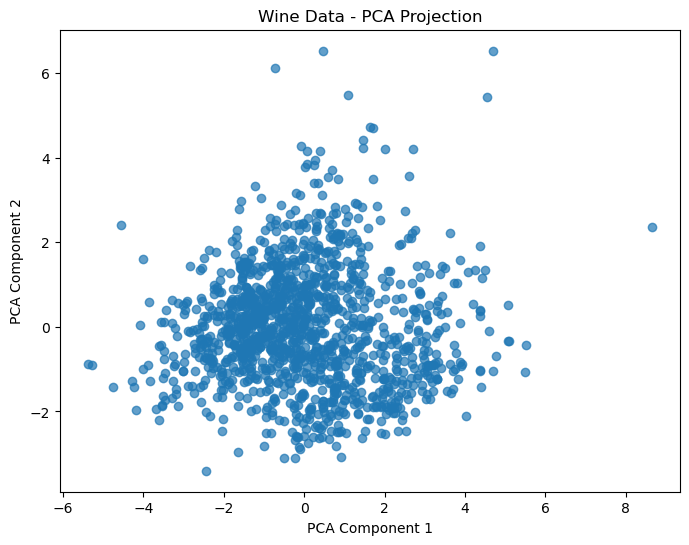

In [468]:
# plot raw data after the PCA reduction
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Wine Data - PCA Projection')
plt.savefig('raw_wine.png')
plt.show()

## Elbow Method (WCSS) and Silhouette Score to Determine Optimal Number of Clusters - KMeans 

C:\Users\mrq_q\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\mrq_q\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\mrq_q\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\mrq_q\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

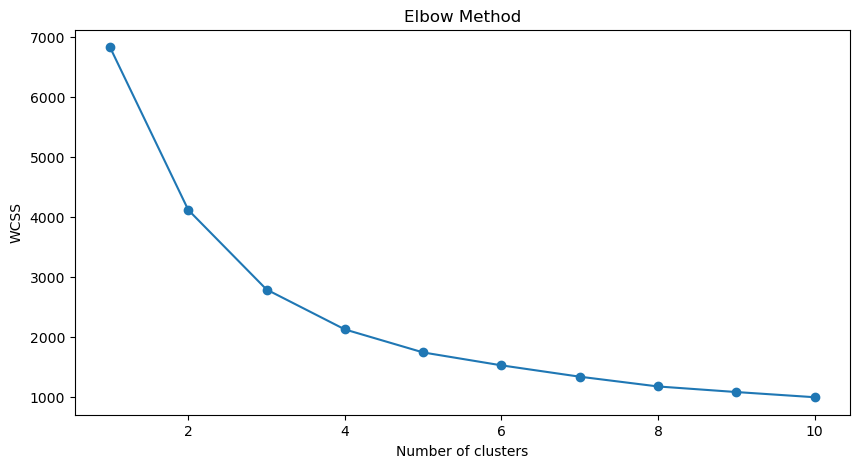

C:\Users\mrq_q\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\mrq_q\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


For n_clusters = 2, the silhouette score is 0.3860017678083208
For n_clusters = 3, the silhouette score is 0.3745682516676064


C:\Users\mrq_q\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\mrq_q\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


For n_clusters = 4, the silhouette score is 0.36747120231071023
For n_clusters = 5, the silhouette score is 0.34327263547091375


C:\Users\mrq_q\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\mrq_q\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


For n_clusters = 6, the silhouette score is 0.33546480650188576
For n_clusters = 7, the silhouette score is 0.33050343181082475
For n_clusters = 8, the silhouette score is 0.3365014154616662


C:\Users\mrq_q\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\mrq_q\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


For n_clusters = 9, the silhouette score is 0.3293291105679704
For n_clusters = 10, the silhouette score is 0.32395727497879545


C:\Users\mrq_q\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


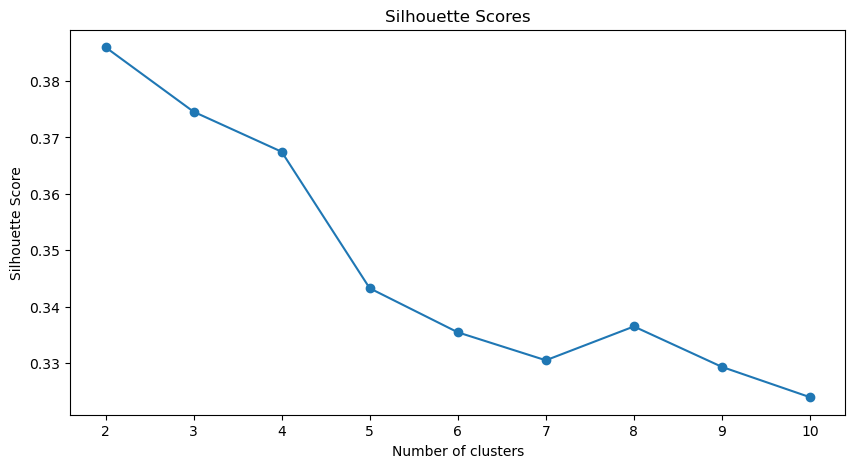

In [470]:
# elbow method - using within-cluster sum of squares (wcss)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('wine_elbow.png')
plt.show()

# silhouette scores for different numbers of clusters 
silhouette_scores = []
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster, random_state=42)
    cluster_labels = kmeans.fit_predict(df_pca)
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_cluster}, the silhouette score is {silhouette_avg}")

plt.figure(figsize=(10,5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.savefig('wine_s_score.png')
plt.show()

Optimal number of clusters for KMeans is 3-4, the Silhouette Scores for this range are relatively high as well compared to other numbers.

## Dendogram & Silhoutte Score to Determine Optimal Number of Clusters - Agglomerative

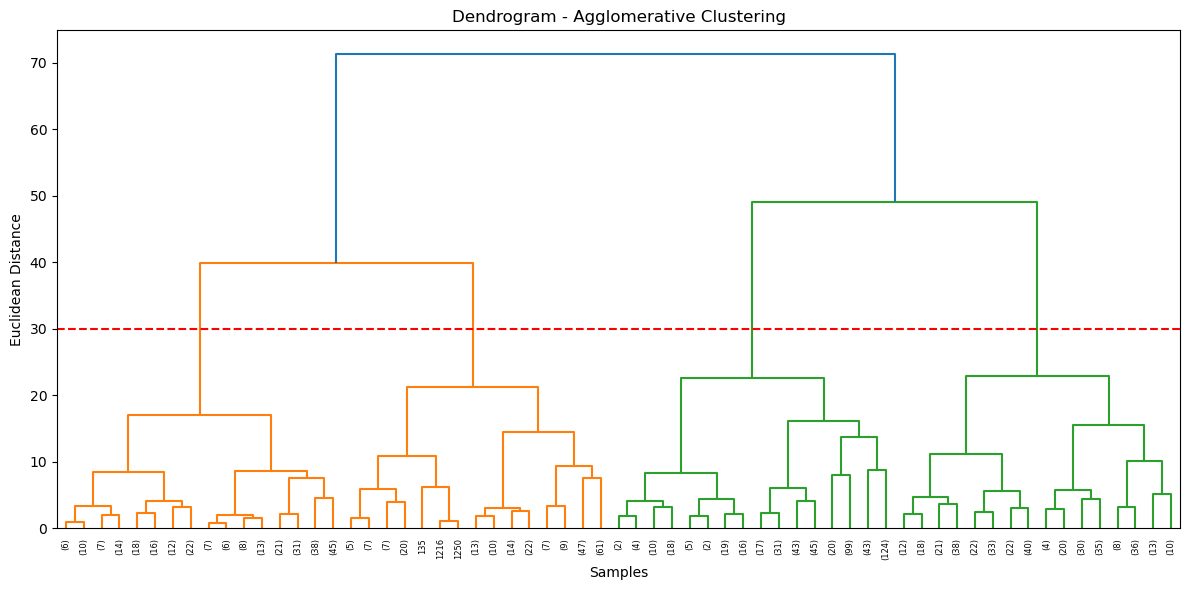

In [474]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# hierarchical clustering using ward linkage - less variances
linked = linkage(df_pca, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='level', p=5, color_threshold=None)
plt.title('Dendrogram - Agglomerative Clustering')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.axhline(y=30, color='r', linestyle='--') 
plt.tight_layout()
plt.savefig('wine_dendogram.png')
plt.show()

For n_clusters = 2, silhouette score = 0.3736
For n_clusters = 3, silhouette score = 0.3351
For n_clusters = 4, silhouette score = 0.3427
For n_clusters = 5, silhouette score = 0.2979
For n_clusters = 6, silhouette score = 0.2905
For n_clusters = 7, silhouette score = 0.2953
For n_clusters = 8, silhouette score = 0.2876
For n_clusters = 9, silhouette score = 0.2664
For n_clusters = 10, silhouette score = 0.2656


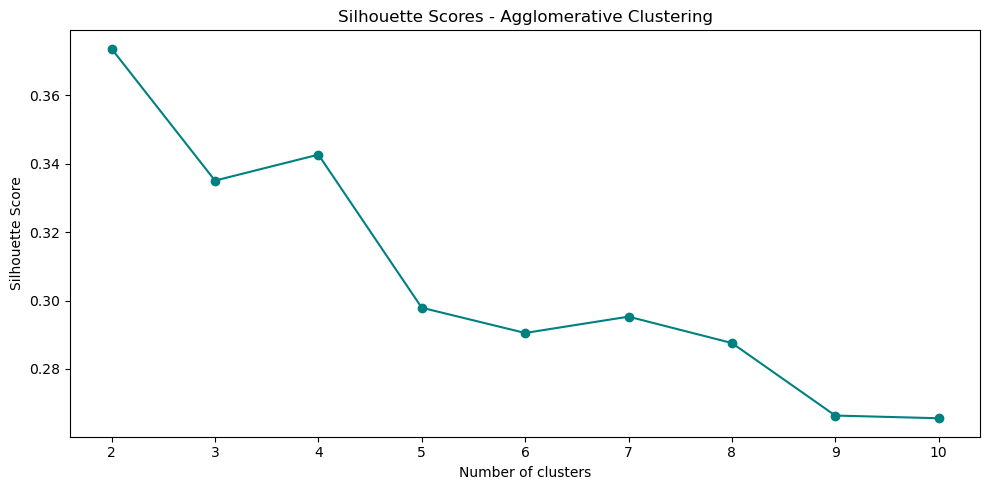

In [475]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

silhouette_scores_agg = []

for n_clusters in range(2, 11):
    agg = AgglomerativeClustering(n_clusters=n_clusters)
    labels = agg.fit_predict(df_pca)
    silhouette_avg = silhouette_score(df_pca, labels)
    silhouette_scores_agg.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, silhouette score = {silhouette_avg:.4f}")

# plot silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores_agg, marker='o', color='teal')
plt.title('Silhouette Scores - Agglomerative Clustering')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.savefig('wine_dbscan_sscore.png')
plt.tight_layout()
plt.show()

Optimal Number of Clusters for Agglomerative also 3-4, with the silhoutte score is higher for 4.

## Estimate the eps parameter using the k-distance graph + KneeLocator

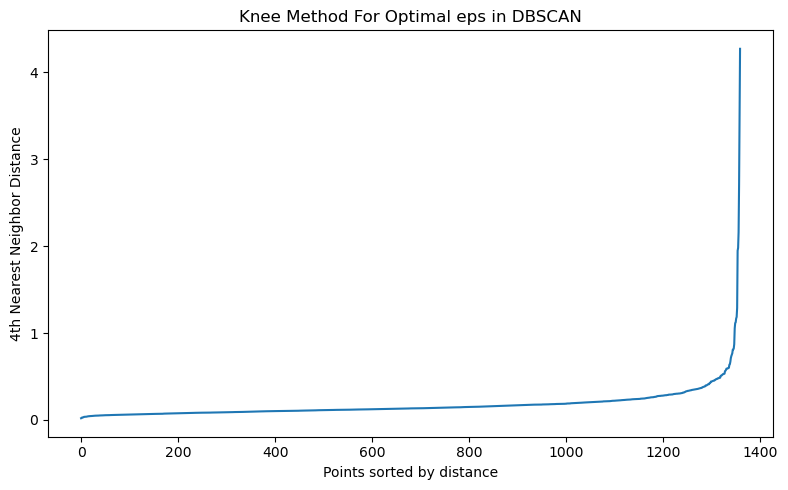

Optimal eps from elbow: 0.5938860713539004


In [479]:
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

# compute the 4th nearest neighbor distances (minpoints - 1)
neighbors = NearestNeighbors(n_neighbors=4) 
neighbors_fit = neighbors.fit(df_pca)  
distances, indices = neighbors_fit.kneighbors(df_pca)

# sort the distances of the 4th nearest neighbor for each point
k_distances = np.sort(distances[:, 3])

# plot distances to identify knee
plt.figure(figsize=(8, 5))
plt.plot(k_distances)
plt.xlabel("Points sorted by distance")
plt.ylabel("4th Nearest Neighbor Distance")
plt.title("Knee Method For Optimal eps in DBSCAN")
plt.tight_layout()

plt.savefig('wine_dbscan_knee.png')
plt.show()

# find the knee point
kneedle = KneeLocator(range(len(k_distances)), k_distances, curve="convex", direction="increasing")
optimal_eps = k_distances[kneedle.knee]

print(f"Optimal eps from elbow: {optimal_eps}")

## Algorithms Implementation

C:\Users\mrq_q\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


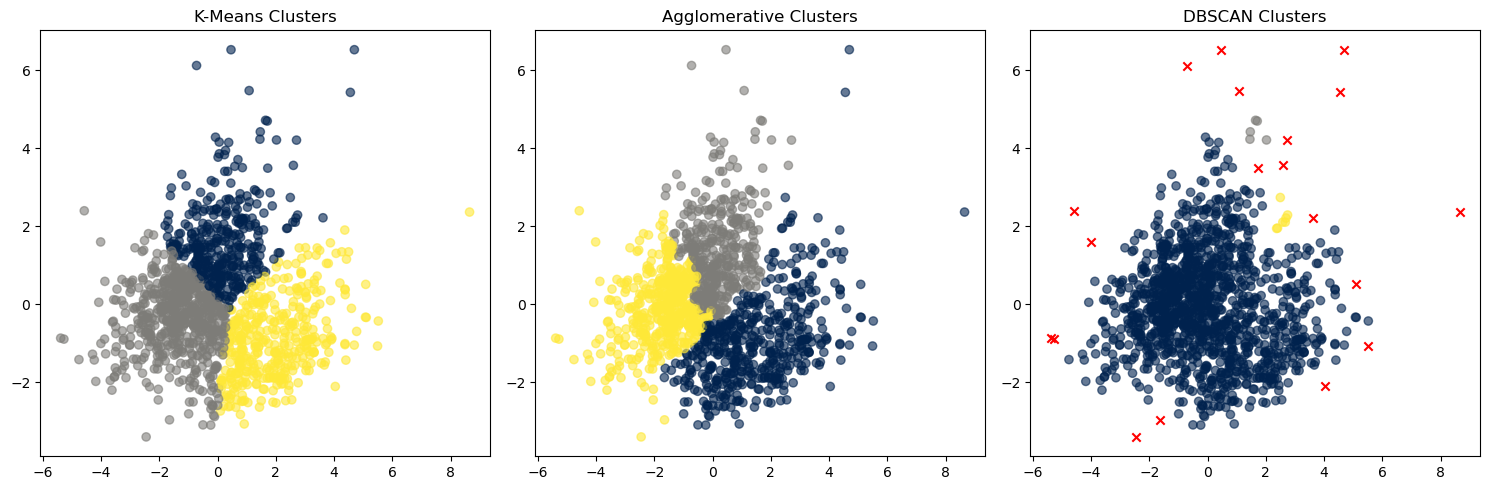

In [499]:
# K-Means (Optimal Num of Cluster Found = 3-4)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(df_pca)

# Agglomerative Clustering (Optimal Num of Cluster Found = 4>3)
agg = AgglomerativeClustering(n_clusters=3)
agg_labels = agg.fit_predict(df_pca)

# DBSCAN (Optimal eps found = 0.6)
dbscan = DBSCAN(eps=optimal_eps, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_pca)

# plots comparison
plt.figure(figsize=(15, 5))

# plot K-Means
plt.subplot(1, 3, 1)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans_labels, cmap="cividis", alpha=0.6)
plt.title("K-Means Clusters")

# plot Agglomerative
plt.subplot(1, 3, 2)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=agg_labels, cmap="cividis", alpha=0.6)
plt.title("Agglomerative Clusters")

# plot DBSCAN
plt.subplot(1, 3, 3)

# boolean mask for noise points
noise_mask = dbscan_labels == -1
non_noise_mask = dbscan_labels != -1

# plot non-noise points
plt.scatter(df_pca[non_noise_mask, 0], df_pca[non_noise_mask, 1],
            c=dbscan_labels[non_noise_mask], cmap="cividis", alpha=0.6, label="Clusters")

# plot noise points in red
plt.scatter(df_pca[noise_mask, 0], df_pca[noise_mask, 1],
            c='red', marker='x', label="Noise")
plt.title("DBSCAN Clusters")
plt.savefig('wine_comparison.png')

plt.tight_layout()
plt.show()